In [14]:
pip install pandas numpy scikit-learn tensorflow openpyxl xlsxwriter

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 159.9/159.9 kB 3.4 MB/s eta 0:00:00


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [3]:
# Load the dataset
data_path = "/content/drive/MyDrive/capstone/heart-1.csv"
data = pd.read_csv(data_path)

In [4]:
# Separate features and labels
X = data.drop('target', axis=1)
y = data['target']

In [5]:
# Function to train and evaluate models
def evaluate_model(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    return accuracy, precision, recall, f1

In [6]:
# Different training and testing splits
splits = [(0.5, 0.5), (0.7, 0.3), (0.3, 0.7)]

# Initialize models
models = {
    "SVM": SVC(),
    "Decision Tree": DecisionTreeClassifier(),
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "KNN": KNeighborsClassifier(),
    "Random Forest": RandomForestClassifier()
}

In [7]:

# Store results
results = []

# Train and test on different splits
for train_size, test_size in splits:
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=train_size, test_size=test_size, random_state=42)

    for model_name, model in models.items():
        accuracy, precision, recall, f1 = evaluate_model(model, X_train, X_test, y_train, y_test)
        results.append({
            'Model': model_name,
            'Train Size': train_size,
            'Test Size': test_size,
            'Accuracy': accuracy,
            'Precision': precision,
            'Recall': recall,
            'F1 Score': f1
        })

In [8]:
# CNN Model
def build_cnn(input_shape):
    model = Sequential()
    model.add(Dense(128, input_shape=(input_shape,), activation='relu'))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

In [9]:
# Evaluate CNN on different splits
for train_size, test_size in splits:
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=train_size, test_size=test_size, random_state=42)

    cnn_model = build_cnn(X_train.shape[1])
    cnn_model.fit(X_train, y_train, epochs=20, verbose=0)  # You can increase epochs for better results
    y_pred = (cnn_model.predict(X_test) > 0.5).astype("int32")

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    results.append({
        'Model': 'CNN',
        'Train Size': train_size,
        'Test Size': test_size,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1
    })

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


In [10]:
# Print the results
results_df = pd.DataFrame(results)
print("\nResults Summary:")
print(results_df)


Results Summary:
                  Model  Train Size  Test Size  Accuracy  Precision    Recall  \
0                   SVM         0.5        0.5  0.664474   0.626016  0.939024   
1         Decision Tree         0.5        0.5  0.750000   0.782051  0.743902   
2   Logistic Regression         0.5        0.5  0.828947   0.841463  0.841463   
3                   KNN         0.5        0.5  0.644737   0.666667  0.682927   
4         Random Forest         0.5        0.5  0.822368   0.848101  0.817073   
5                   SVM         0.7        0.3  0.703297   0.671642  0.900000   
6         Decision Tree         0.7        0.3  0.725275   0.790698  0.680000   
7   Logistic Regression         0.7        0.3  0.813187   0.823529  0.840000   
8                   KNN         0.7        0.3  0.659341   0.679245  0.720000   
9         Random Forest         0.7        0.3  0.857143   0.862745  0.880000   
10                  SVM         0.3        0.7  0.586854   0.571429  0.965517   
11        

In [16]:
# Find the best model based on the highest average accuracy
best_model = results_df.groupby('Model')['Accuracy'].mean().idxmax()
best_accuracy = results_df.groupby('Model')['Accuracy'].mean().max()

print(f"\nBest Model: {best_model} with an average accuracy of {best_accuracy:.4f}")


Best Model: Random Forest with an average accuracy of 0.8368


In [17]:
# Prepare best model summary
best_model_summary = pd.DataFrame({
    'Best Model': [best_model],
    'Average Accuracy': [best_accuracy]
})

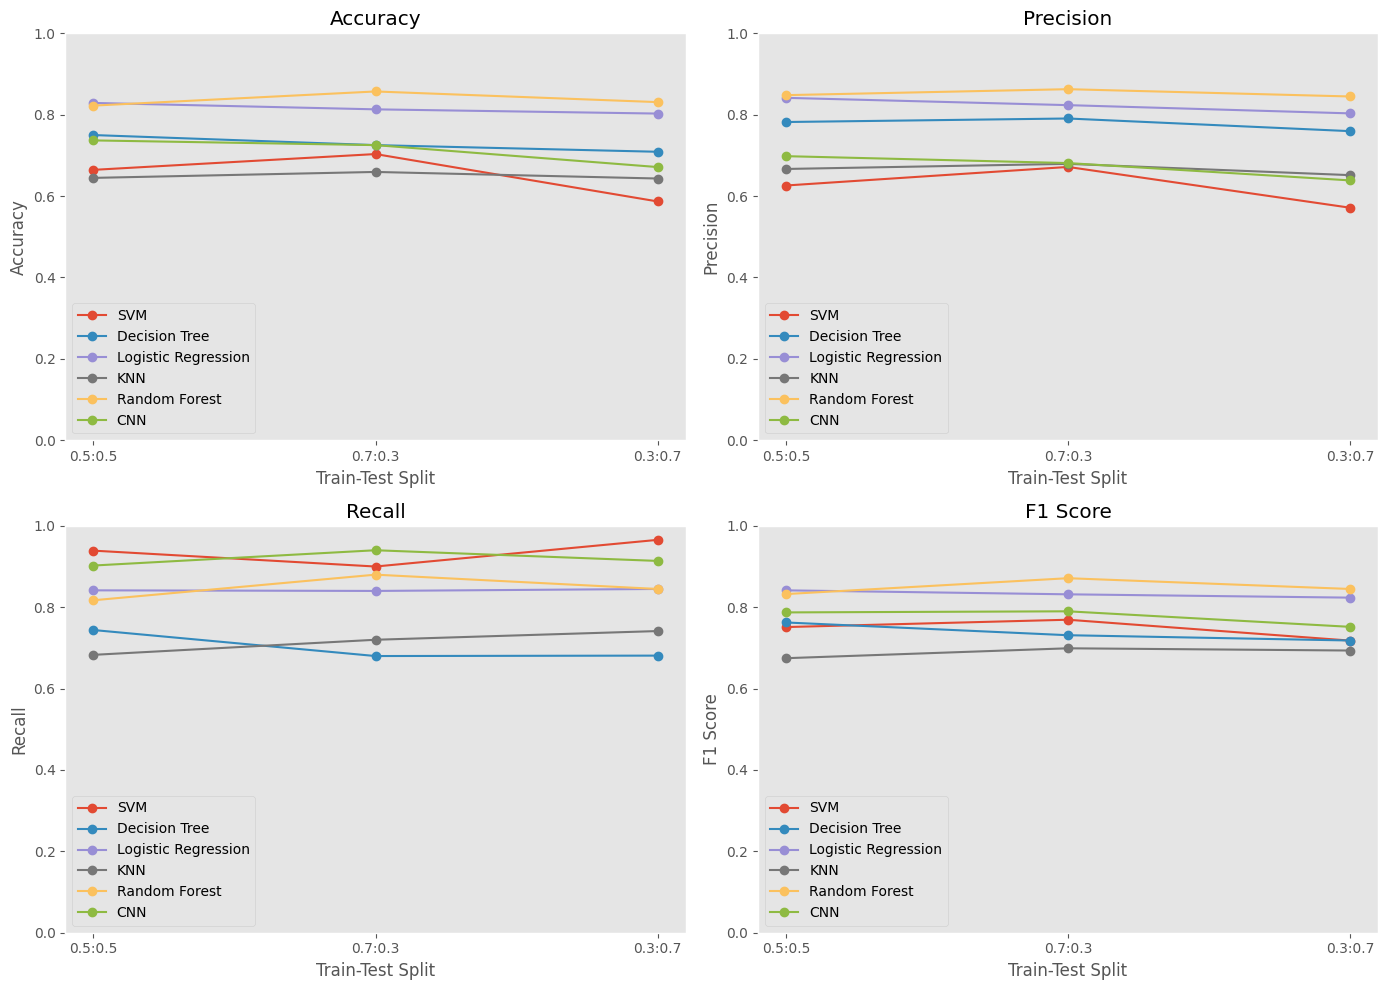

In [12]:
# Plotting results
# Set plot style
plt.style.use('ggplot')

# Create subplots for metrics
fig, axs = plt.subplots(2, 2, figsize=(14, 10))
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']

# Plot each metric
for i, metric in enumerate(metrics):
    ax = axs[i // 2, i % 2]
    for model in results_df['Model'].unique():
        subset = results_df[results_df['Model'] == model]
        ax.plot(subset['Train Size'].astype(str) + ':' + subset['Test Size'].astype(str),
                subset[metric], marker='o', label=model)

    ax.set_title(metric)
    ax.set_xlabel('Train-Test Split')
    ax.set_ylabel(metric)
    ax.set_ylim(0, 1)
    ax.legend()
    ax.grid()

plt.tight_layout()
plt.show()

In [18]:
# Saving results to an Excel file
excel_path = '/content/drive/MyDrive/capstone/model_evaluation_results_all_models.xlsx'

# Create a Pandas Excel writer using XlsxWriter as the engine.
with pd.ExcelWriter(excel_path, engine='xlsxwriter') as writer:
    # Write the results DataFrame to the first sheet
    results_df.to_excel(writer, sheet_name='Results', index=False)
    # Write the best model summary to a new sheet
    best_model_summary.to_excel(writer, sheet_name='Best Model', index=False)

print(f"Results saved to {excel_path}")

Results saved to /content/drive/MyDrive/capstone/model_evaluation_results_all_models.xlsx
